In [1]:
import pandas as pd
import os

import bokeh
from bokeh.io import output_notebook, curdoc, reset_output
from bokeh.plotting import figure, output_file, show, ColumnDataSource

import numpy as np
import scipy.special
# used to standardize plot size below
GLOBAL_WIDTH = 800
GLOBAL_HEIGHT = 600

# display notebooks inline
output_notebook() 
import bokeh.plotting as bk
from bokeh.models import Span, Label
from bokeh.layouts import row
\
from bokeh.sampledata.autompg import autompg as df
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

Loading BokehJS ...

In [2]:
pp = pd.read_csv('../data/picasso.csv')
pp2 = pd.read_csv('../data/henri_dic.csv')
pp = pp.rename(columns={'Unnamed: 0': 'Picturesource', '0': 'Painting'})
pp2 = pp2.rename(columns={'Unnamed: 0': 'Picturesource', '0': 'Painting'})

In [3]:
picasso = pd.read_csv('../data/picasso_data.csv')
picasso['Painting'] = picasso['Painting'].apply(lambda x: x[2:-8])
picasso

,Picturesource,Painting,Year,Portrait,RMS_contrast,AVG_entropy,RMS_contrast_log,AVG_entropy_log,erotic_charge
0,images-works-3437_s.jpg,maternity,1905,0.0,0.271341,3.756512,-1.881822,1.909394,0.013786
1,images-works-56_s.jpg,les demoiselles d'avignon (the young ladies of...,1907,1.0,0.197231,5.041706,-2.342045,2.333912,-0.004066
2,images-works-1513_s.jpg,portrait of woman,1938,1.0,0.191595,5.023209,-2.383869,2.328609,-0.027630
3,images-works-3570_s.jpg,naked woman,1902,1.0,0.145416,5.223912,-2.781742,2.385131,-0.198306
4,images-works-1459_s.jpg,woman with a blue hat,1939,1.0,0.262751,5.015289,-1.928229,2.326333,0.199052
...,...,...,...,...,...,...,...,...,...
118,images-works-4053_s.jpg,seated woman in blue dress,1939,1.0,0.146214,4.933578,-2.773851,2.302634,-0.235608
119,images-works-2244_s.jpg,profile female bust,1932,1.0,0.261993,4.519896,-1.932402,2.176290,0.121944
120,images-works-1760_s.jpg,woman sitting in an armchair,1941,1.0,0.142179,4.642326,-2.814218,2.214848,-0.299685
121,images-works-2693_s.jpg,head and woman's hand,1921,1.0,0.202769,4.721895,-2.302092,2.239366,-0.031363


In [4]:
matisse = pd.read_csv('../data/matisse_data.csv')
matisse['Painting'] = matisse['Painting'].apply(lambda x: x[2:-8])
matisse

,Picturesource,Painting,Year,Portrait,RMS_contrast,AVG_entropy,RMS_contrast_log,AVG_entropy_log,erotic_charge
0,paintings-thmbnls150-bb.jpg,standing model,1901,1.0,0.161886,4.809607,-2.626949,2.265919,-0.180515
1,paintings-thmbnls150-bd.jpg,nude with a white wash towel,1903,1.0,0.158400,4.845199,-2.658352,2.276556,-0.190898
2,paintings-thmbnls150-bc.jpg,carmelina,1903,1.0,0.198444,5.141422,-2.333199,2.362168,0.014484
3,paintings-thmbnls150-cs.jpg,the green line (portrait of madame matisse),1905,0.0,0.173126,5.002342,-2.530106,2.322604,-0.103751
4,paintings-thmbnls150-dr.jpg,woman with a hat (madame matisse),1905,0.0,0.202277,5.171739,-2.305596,2.370650,0.032527
5,paintings-thmbnls150-zd.jpg,blue nude,1905,0.0,0.229223,5.315706,-2.125175,2.410261,0.142543
6,paintings-thmbnls150-hma308.jpg,woman with a parasol,1905,1.0,0.118171,5.196761,-3.081048,2.377613,-0.351717
7,paintings-thmbnls150-gk.jpg,interior at collioure,1906,1.0,0.164125,5.229967,-2.607129,2.386802,-0.110163
8,paintings-orient_111_thmb.jpg,woman on a terrace,1907,1.0,0.174502,5.026028,-2.518683,2.329419,-0.094632
9,paintings-thmbnls150-cb.jpg,woman in green,1909,1.0,0.197941,4.767572,-2.336854,2.253255,-0.041800


In [5]:
# pdf = pd.read_csv('../data/picasso_data.csv')
# mdf = pd.read_csv('../data/matisse_data.csv')
# pdf['Picturesource'] = pdf['Picturesource'].apply(lambda x: os.path.join(os.pardir, 'data/picasso', x))
# pdf['Painting'] = pp['Painting'].apply(lambda x: x[2:-8])
# pdfp=pdf[pdf["Portrait"]==1]
# mdf['Picturesource'] = mdf['Picturesource'].apply(lambda x: os.path.join(os.pardir, 'data/henri-matisse', x))
# mdf['Painting'] = pp2['Painting'].apply(lambda x: x[2:-8])
# mdfp=mdf[mdf["Portrait"]==1]

**Compare the log RMS of paintings of two artists**

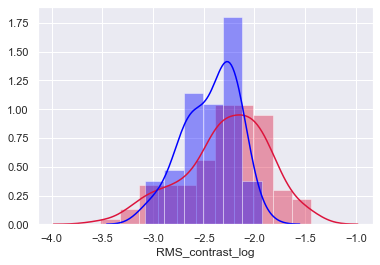

In [6]:
picasso_RMS_contrast_log = sns.distplot(picasso.RMS_contrast_log, color = 'crimson')
matisse_RMS_contrast_log = sns.distplot(matisse.RMS_contrast_log, color = 'blue')
# display(a,b)

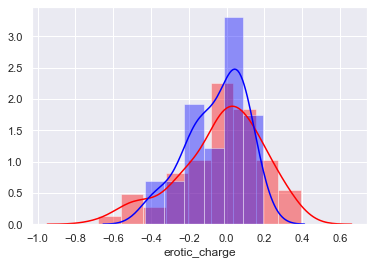

In [7]:
picasso_erotic = sns.distplot(picasso.erotic_charge, color = 'red')
matisse_erotic = sns.distplot(matisse.erotic_charge, color = 'blue')

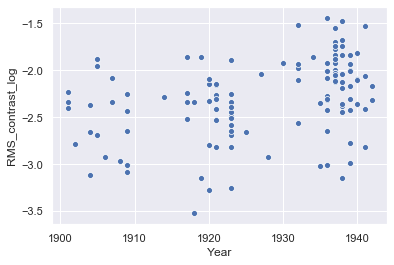

In [8]:
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
# f, ax = plt.subplots(figsize=(6.5, 6.5))
# sns.scatterplot(x="Year", y="RMS_contrast_log",
#                 hue="clarity", size="depth",
#                 palette="ch:r=-.2,d=.3_r",
#                 hue_order=clarity_ranking,
#                 sizes=(1, 8), linewidth=0,
#                 data=picasso, ax =ax)
sns.scatterplot(x='Year', y = 'RMS_contrast_log',data = picasso)

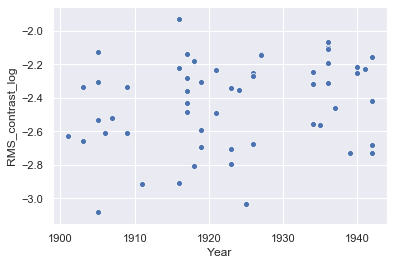

In [9]:
sns.scatterplot(x='Year', y = 'RMS_contrast_log',data = matisse)

In [10]:
p_meanRMS=pdfp.groupby('Year').mean()
m_meanRMS=mdfp.groupby('Year').mean()

NameError: name 'pdfp' is not defined

In [11]:
p_meanRMS

NameError: name 'p_meanRMS' is not defined

In [12]:
bins=np.linspace(min(pdfp['RMS_contrast']), max(pdfp['RMS_contrast']), 7)
pdfp['RMS_contrast'].plot.hist(bins=bins, rwidth=0.9, label="Picasso")
mdfp['RMS_contrast'].plot.hist(bins=bins, rwidth=0.9, label="Matisse")
plt.title("Picasso's RMS Contrast Value vs. Matisse's RMS Contrast Value")
plt.xlabel('RMS Contrast Value')
plt.ylabel('Count(#)')

NameError: name 'pdfp' is not defined

In [13]:
x = p_meanRMS.index
y = p_meanRMS['RMS_contrast']

x2 = m_meanRMS.index
y2 = m_meanRMS['RMS_contrast']


output_notebook()

p = figure(title="Compare Mean RMS contrast overyear", x_axis_label='Year', y_axis_label='Mean_RMS_contrast')

p.line(x, y, legend_label="Picasso_Mean_RMS_contrast_overyear", line_width=2)
p.line(x2, y2, legend_label="Matisse_Mean_RMS_contrast_overyear", line_width=2,line_color="#f46d43")

show(p)

NameError: name 'p_meanRMS' is not defined

In [14]:
x = p_meanRMS.index
y = p_meanRMS['erotic_charge']

x2 = m_meanRMS.index
y2 = m_meanRMS['erotic_charge']


# display inline
output_notebook()

# create a new plot with a title and axis labels
p = figure(title="Compare Erotic Charge overyear", x_axis_label='Year', y_axis_label='erotic_charge')

# add a line renderer with legend and line thickness
p.line(x, y, legend_label="Picasso_erotic_charge_overyear", line_width=2)
p.line(x2, y2, legend_label="Matisse_erotic_charge_overyear", line_width=2,line_color="#f46d43")

# show the results
show(p)

NameError: name 'p_meanRMS' is not defined

In [15]:
x = pdfp['RMS_contrast']
y = pdfp['AVG_entropy']

x2 = mdfp['RMS_contrast']
y2 = mdfp['AVG_entropy']

# plotting
p = figure(title="Picasso & Matisso's paintings' RMS contrast value vs. AVG_entropy",plot_width=GLOBAL_WIDTH, plot_height=GLOBAL_HEIGHT, x_axis_label='RMS_contrast', y_axis_label='AVG_entropy')

# add a circle renderer with a size, color, and alpha
p.circle(x, y, size=5, color="red", alpha=0.9,legend_label="Picasso")
p.circle(x2, y2, size=5, color="blue", alpha=0.9,legend_label="Matisso")

# show the results
show(p)

NameError: name 'pdfp' is not defined

In [16]:
source = ColumnDataSource(data=dict(
    x=pdfp['Year'],
    y=pdfp['RMS_contrast_log'],
    desc=pdfp['Painting'],
    imgs=pdfp['Picturesource'],
    fonts=[
        '<i>italics</i>' for i in range(len(pdfp.index))
    ]
))

source2 = ColumnDataSource(data=dict(
    x2=mdfp['Year'],
    y2=mdfp['RMS_contrast_log'],
    desc=mdfp['Painting'],
    imgs=mdfp['Picturesource'],
    fonts=[
        '<i>italics</i>' for i in range(len(mdfp.index))
    ]
))


TOOLTIPS = """
    <div>
        <div>
            <img
                src="@imgs" height="42" alt="@imgs" width="42"
                style="float: left; margin: 0px 15px 15px 0px;"
                border="2"
            ></img>
        </div>
        <div>
            <span style="font-size: 17px; font-weight: bold;">@desc</span>
            <span style="font-size: 15px; color: #966;">[$index]</span>
        </div>
        <div>
            <span style="font-size: 15px;">Painting Year:</span>
            <span style="font-size: 10px; color: #696;">$x{0}</span>
        </div>
        <div>
            <span style="font-size: 15px;">RMS Contrast Log Value:</span>
            <span style="font-size: 10px; color: #696;">$y</span>
        </div>
    </div>
"""
TOOLTIPS2 = """
    <div>
        <div>
            <span style="font-size: 15px;">The year they met each other.</span>
        </div>
    </div>
"""

p = figure(plot_width=GLOBAL_WIDTH, plot_height=GLOBAL_HEIGHT, tooltips=TOOLTIPS,
           title="Painings' RMS contrast log Value Throughout Year",x_axis_label='Year', y_axis_label='RMS_contrast_log')

p.circle('x', 'y', size=10, source=source,color="red",legend_label="Picasso")
p.circle('x2', 'y2', size=10, source=source2,legend_label="Matisso")
vline = Span(location=1906, dimension='height', line_color='black', line_width=1,line_dash="dashed")
p.renderers.extend([vline])
my_label = Label(x=1906, y=500, y_units='screen', text='Year 1906 when they met each other')
p.add_layout(my_label)
show(p)

NameError: name 'pdfp' is not defined

In [121]:
source = ColumnDataSource(data=dict(
    x=pdfp['Year'],
    y=pdfp['AVG_entropy_log'],
    desc=pdfp['Painting'],
    imgs=pdfp['Picturesource'],
    fonts=[
        '<i>italics</i>' for i in range(len(pdfp.index))
    ]
))

source2 = ColumnDataSource(data=dict(
    x2=mdfp['Year'],
    y2=mdfp['AVG_entropy_log'],
    desc=mdfp['Painting'],
    imgs=mdfp['Picturesource'],
    fonts=[
        '<i>italics</i>' for i in range(len(mdfp.index))
    ]
))


TOOLTIPS = """
    <div>
        <div>
            <img
                src="@imgs" height="42" alt="@imgs" width="42"
                style="float: left; margin: 0px 15px 15px 0px;"
                border="2"
            ></img>
        </div>
        <div>
            <span style="font-size: 17px; font-weight: bold;">@desc</span>
            <span style="font-size: 15px; color: #966;">[$index]</span>
        </div>
        <div>
            <span style="font-size: 15px;">Painting Year:</span>
            <span style="font-size: 10px; color: #696;">$x{0}</span>
        </div>
        <div>
            <span style="font-size: 15px;">AVG Entropy Log</span>
            <span style="font-size: 10px; color: #696;">$y</span>
        </div>
    </div>
"""
TOOLTIPS2 = """
    <div>
        <div>
            <span style="font-size: 15px;">The year they met each other.</span>
        </div>
    </div>
"""

p = figure(plot_width=GLOBAL_WIDTH, plot_height=GLOBAL_HEIGHT, tooltips=TOOLTIPS,
           title="Painings' AVG Entropy Log Value Throughout Year",x_axis_label='Year', y_axis_label='AVG_entropy_log')

p.circle('x', 'y', size=10, source=source,color="red",legend_label="Picasso")
p.circle('x2', 'y2', size=10, source=source2,legend_label="Matisso")
vline = Span(location=1906, dimension='height', line_color='black', line_width=1,line_dash="dashed")
p.renderers.extend([vline])
my_label = Label(x=1906, y=500, y_units='screen', text='Year 1906 when they met each other')
p.add_layout(my_label)
show(p)

In [120]:
source = ColumnDataSource(data=dict(
    x=pdfp['Year'],
    y=pdfp['erotic_charge'],
    desc=pdfp['Painting'],
    imgs=pdfp['Picturesource'],
    fonts=[
        '<i>italics</i>' for i in range(len(pdfp.index))
    ]
))

source2 = ColumnDataSource(data=dict(
    x2=mdfp['Year'],
    y2=mdfp['erotic_charge'],
    desc=mdfp['Painting'],
    imgs=mdfp['Picturesource'],
    fonts=[
        '<i>italics</i>' for i in range(len(mdfp.index))
    ]
))


TOOLTIPS = """
    <div>
        <div>
            <img
                src="@imgs" height="42" alt="@imgs" width="42"
                style="float: left; margin: 0px 15px 15px 0px;"
                border="2"
            ></img>
        </div>
        <div>
            <span style="font-size: 17px; font-weight: bold;">@desc</span>
            <span style="font-size: 15px; color: #966;">[$index]</span>
        </div>
        <div>
            <span style="font-size: 15px;">Painting Year:</span>
            <span style="font-size: 10px; color: #696;">$x{0}</span>
        </div>
        <div>
            <span style="font-size: 15px;">Erotic Charge Value:</span>
            <span style="font-size: 10px; color: #696;">$y{0.000}</span>
        </div>
    </div>
"""
TOOLTIPS2 = """
    <div>
        <div>
            <span style="font-size: 15px;">The year they met each other.</span>
        </div>
    </div>
"""

p = figure(plot_width=GLOBAL_WIDTH, plot_height=GLOBAL_HEIGHT, tooltips=TOOLTIPS,
           title="Painings' Erotic Charge Value Throughout Year",x_axis_label='Year', y_axis_label='erotic_charge')

p.circle('x', 'y', size=10, source=source,color="red",legend_label="Picasso")
p.circle('x2', 'y2', size=10, source=source2,legend_label="Matisso")
vline = Span(location=1906, dimension='height', line_color='black', line_width=1,line_dash="dashed")
p.renderers.extend([vline])
my_label = Label(x=1906, y=500, y_units='screen', text='Year 1906 when they met each other')
p.add_layout(my_label)
show(p)